# Loading Claudio's image data

Higher frame rate data (5min interval) to test tracking on

In [2]:
import os, glob, re, enum
from skimage.io import imread, imshow

In [3]:
@enum.unique
class Channels(enum.Enum):
    BRIGHTFIELD = 0
    GFP = 1
    RFP = 2
    IRFP = 3
    MASK_2 = 97
    MASK_1 = 98
    MASK = 99

def parse_filename(filename: os.PathLike) -> dict:
    """Parse an OctopusHeavy filename and retreive metadata from the file.

    Parameters
    ----------
    filename : PathLike
        The full path to a file to parse.

    Returns
    -------
    metadata : dict
        A dictionary containing the parsed metadata.
    """
    
#     OCTOPUSHEAVY_FILEPATTERN =(
#         "r(?P<row>[0-9]+)c(?P<column>[0-9]+)f(?P<fov>[0-9]+)p(?P<plane>[0-9]+)-ch(?P<channel>[0-9]+)"
#         "sk(?P<time>[0-9]+)fk(?P<fk>[0-9]+)fl(?P<fl>[0-9]+)"
#         )
    
    OCTOPUSHEAVY_FILEPATTERN =(
        "r(?P<row>[0-9]+)c(?P<column>[0-9]+)-(?P<ID>[0-9]+)"
        )
    
    path, filename = os.path.split(filename)
    params = re.match(OCTOPUSHEAVY_FILEPATTERN, filename)

    filename_metadata = {
        "filename": filename,
#         "channel": Channels(int(params.group("channel"))),
#         "time": params.group("time"),
        "row": params.group("row"), 
        "column": params.group("column"), 
        "ID": params.group("ID"), 
#         "fov": params.group("fov"), 
#         "plane": params.group("plane"), 
#         "fk": params.group("fk"), 
#         "fl": params.group("fl")

    }

    return filename_metadata

### Define image directory

In [4]:
expt_ID = '40e55fc4-6712-4d97-a921-61f0ee933038'
image_dir = f'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/RELOCATED_2021/Claudio 2021/{expt_ID}'
fns = glob.glob(os.path.join(image_dir, '*.tiff'))
len(fns)

5400

In [76]:
print(fns[0],'\n', parse_filename(fns[0]))

/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/RELOCATED_2021/Claudio 2021/40e55fc4-6712-4d97-a921-61f0ee933038/r01c04-0757058077.tiff 
 {'filename': 'r01c04-0757058077.tiff', 'row': '01', 'column': '04', 'ID': '0757058077'}


In [5]:
print(os.path.basename(fns[0]),'\n', parse_filename(fns[0]))

r01c04-0757058077.tiff 
 {'filename': 'r01c04-0757058077.tiff', 'row': '01', 'column': '04', 'ID': '0757058077'}


## Extract filename metadata 

In [92]:
row_list, col_list, ID_list = [], [], []
for fn in fns:
    fn_metadata = parse_filename(fn)
    row, col, ID = fn_metadata['row'], fn_metadata['column'], fn_metadata['ID']
    row_list.append(row)
    col_list.append(col)
    ID_list.append(ID)
row_list = set(row_list)
col_list = set(col_list)
ID_list = set(ID_list)

In [93]:
row_list, col_list

({'01', '02', '03', '04', '05', '06'}, {'04'})

In [95]:
len(ID_list)

5400

This shows that each number after the row and column list is unique to that filename... I have no idea of how to use this unique number to gauge where the Z plane is, what the time point is etc etc. 

## Find metadata

-- although I have no way of extracting anything meaningful from this metadata...

In [27]:
os.path.dirname(fns[0])

'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/RELOCATED_2021/Claudio 2021/40e55fc4-6712-4d97-a921-61f0ee933038'

In [54]:
metadata_fns = glob.glob(f'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/MEASUREMENT/{expt_ID}*.xml')

In [56]:
metadata_fns

['/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/MEASUREMENT/40e55fc4-6712-4d97-a921-61f0ee933038-attmt.xml',
 '/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/MEASUREMENT/40e55fc4-6712-4d97-a921-61f0ee933038.xml']

Don't know how to extract anything meaningful from this metadata, here's all the available metadata files for my given experiment ID

In [113]:
glob.glob(f'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/*/40e55*')

['/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/MEASUREMENT/40e55fc4-6712-4d97-a921-61f0ee933038-attmt.xml',
 '/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/opera microscope master backup/XML/MEASUREMENT/40e55fc4-6712-4d97-a921-61f0ee933038.xml']

#### What does the unknown ID part of the filename actually look like?

In [7]:
from natsort import natsorted

In [9]:
unknown_IDs = []
for fn in natsorted(fns):
    fn_metadata = parse_filename(fn)
    print(os.path.basename(fn),)# int(fn_metadata['ID']))
    unknown_IDs.append(int(fn_metadata['ID']))

r01c04-0000426476.tiff
r01c04-0003217728.tiff
r01c04-0009963480.tiff
r01c04-0013774404.tiff
r01c04-0014106759.tiff
r01c04-0017105233.tiff
r01c04-0021404692.tiff
r01c04-0035124010.tiff
r01c04-0038264679.tiff
r01c04-0039438794.tiff
r01c04-0041065603.tiff
r01c04-0041956626.tiff
r01c04-0042716304.tiff
r01c04-0045587328.tiff
r01c04-0050442564.tiff
r01c04-0051529897.tiff
r01c04-0051690357.tiff
r01c04-0055151500.tiff
r01c04-0055492961.tiff
r01c04-0061378095.tiff
r01c04-0062273256.tiff
r01c04-0065055280.tiff
r01c04-0065178780.tiff
r01c04-0066089487.tiff
r01c04-0067991042.tiff
r01c04-0068030328.tiff
r01c04-0074729616.tiff
r01c04-0078851392.tiff
r01c04-0079376979.tiff
r01c04-0079524249.tiff
r01c04-0083106970.tiff
r01c04-0083242373.tiff
r01c04-0084274561.tiff
r01c04-0084434901.tiff
r01c04-0086731368.tiff
r01c04-0086971703.tiff
r01c04-0090742033.tiff
r01c04-0093015411.tiff
r01c04-0093612745.tiff
r01c04-0094066277.tiff
r01c04-0098005960.tiff
r01c04-0099994347.tiff
r01c04-0100187003.tiff
r01c04-0102

r03c04-0708697110.tiff
r03c04-0720720464.tiff
r03c04-0727246396.tiff
r03c04-0727551928.tiff
r03c04-0729807445.tiff
r03c04-0735261383.tiff
r03c04-0740437704.tiff
r03c04-0745056611.tiff
r03c04-0749615544.tiff
r03c04-0749808053.tiff
r03c04-0752264094.tiff
r03c04-0752625240.tiff
r03c04-0757377621.tiff
r03c04-0758471113.tiff
r03c04-0759399124.tiff
r03c04-0760686317.tiff
r03c04-0761125079.tiff
r03c04-0761211317.tiff
r03c04-0761601345.tiff
r03c04-0763806919.tiff
r03c04-0766715738.tiff
r03c04-0766743119.tiff
r03c04-0766909209.tiff
r03c04-0769884391.tiff
r03c04-0770334445.tiff
r03c04-0770709625.tiff
r03c04-0771708574.tiff
r03c04-0773516281.tiff
r03c04-0774556208.tiff
r03c04-0775759789.tiff
r03c04-0775904097.tiff
r03c04-0783833815.tiff
r03c04-0786642514.tiff
r03c04-0787457017.tiff
r03c04-0789695738.tiff
r03c04-0790837029.tiff
r03c04-0797947508.tiff
r03c04-0799996722.tiff
r03c04-0805698808.tiff
r03c04-0806325207.tiff
r03c04-0806422723.tiff
r03c04-0808628188.tiff
r03c04-0813309110.tiff
r03c04-0818

r04c04-1446345577.tiff
r04c04-1447492800.tiff
r04c04-1447999956.tiff
r04c04-1448385619.tiff
r04c04-1450493727.tiff
r04c04-1456179631.tiff
r04c04-1458514637.tiff
r04c04-1462003246.tiff
r04c04-1463183796.tiff
r04c04-1465732285.tiff
r04c04-1467148071.tiff
r04c04-1469714064.tiff
r04c04-1473191799.tiff
r04c04-1474337270.tiff
r04c04-1476266818.tiff
r04c04-1480212394.tiff
r04c04-1483199251.tiff
r04c04-1484742690.tiff
r04c04-1486291383.tiff
r04c04-1488647678.tiff
r04c04-1489338102.tiff
r04c04-1492521303.tiff
r04c04-1492723578.tiff
r04c04-1494506421.tiff
r04c04-1498600735.tiff
r04c04-1502098029.tiff
r04c04-1508329727.tiff
r04c04-1509066162.tiff
r04c04-1509959736.tiff
r04c04-1510074941.tiff
r04c04-1515468752.tiff
r04c04-1518109496.tiff
r04c04-1523291203.tiff
r04c04-1531312070.tiff
r04c04-1531675605.tiff
r04c04-1533902681.tiff
r04c04-1534561675.tiff
r04c04-1534713691.tiff
r04c04-1537640675.tiff
r04c04-1541480529.tiff
r04c04-1543073403.tiff
r04c04-1548536149.tiff
r04c04-1549709257.tiff
r04c04-1551

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

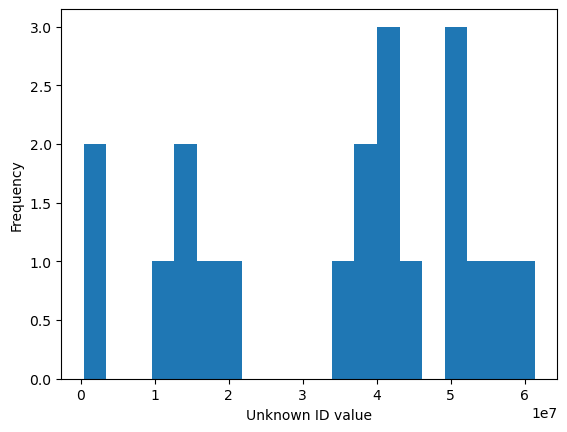

In [12]:
plt.hist(unknown_IDs[0:20], bins = 20)
plt.xlabel('Unknown ID value')
plt.ylabel('Frequency')

In [58]:
fn_metadata

{'filename': 'r01c04-0757058077.tiff',
 'row': '01',
 'column': '04',
 'ID': '0757058077'}

## Load as Dask array despite not having correct metadata structuring info

In [78]:
import dask
import dask.array as da
import imageio
import numpy as np

In [79]:
sample = imageio.imread(fns[0])
sample.shape

(2160, 2160)

In [80]:
lazy_arrays = [dask.delayed(imageio.imread)(fn) for fn in fns]
lazy_arrays = [da.from_delayed(x, shape=sample.shape, dtype=sample.dtype)
               for x in lazy_arrays]

In [81]:
len(lazy_arrays)

5400

In [82]:
lazy_arrays[0]

dask.array<from-value, shape=(2160, 2160), dtype=uint16, chunksize=(2160, 2160), chunktype=numpy.ndarray>

In [96]:
test = da.stack(lazy_arrays, axis=0)

In [97]:
test

dask.array<stack, shape=(5400, 2160, 2160), dtype=uint16, chunksize=(1, 2160, 2160), chunktype=numpy.ndarray>

Now test on natsorted filelist

In [99]:
lazy_arrays = [dask.delayed(imageio.imread)(fn) for fn in natsorted(fns)]
lazy_arrays = [da.from_delayed(x, shape=sample.shape, dtype=sample.dtype)
               for x in lazy_arrays]

In [101]:
test2 = da.stack(lazy_arrays, axis=0)

In [102]:
v = napari.Viewer()

v.add_image(test, name = 1, blending = 'additive')
v.add_image(test2, name = 2, blending = 'additive')

@v.bind_key('t')
def extract_fn(event=None):

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer '2' at 0x7f17240a5ee0>

In [119]:
for n, fn in enumerate(natsorted(fns)):
    print(n, '/', os.path.basename(fn).split('-')[-1].removesuffix('.tiff'))

0 / 0000426476
1 / 0003217728
2 / 0009963480
3 / 0013774404
4 / 0014106759
5 / 0017105233
6 / 0021404692
7 / 0035124010
8 / 0038264679
9 / 0039438794
10 / 0041065603
11 / 0041956626
12 / 0042716304
13 / 0045587328
14 / 0050442564
15 / 0051529897
16 / 0051690357
17 / 0055151500
18 / 0055492961
19 / 0061378095
20 / 0062273256
21 / 0065055280
22 / 0065178780
23 / 0066089487
24 / 0067991042
25 / 0068030328
26 / 0074729616
27 / 0078851392
28 / 0079376979
29 / 0079524249
30 / 0083106970
31 / 0083242373
32 / 0084274561
33 / 0084434901
34 / 0086731368
35 / 0086971703
36 / 0090742033
37 / 0093015411
38 / 0093612745
39 / 0094066277
40 / 0098005960
41 / 0099994347
42 / 0100187003
43 / 0102415026
44 / 0103397388
45 / 0106086735
46 / 0106469223
47 / 0110326866
48 / 0112342538
49 / 0112847959
50 / 0114172159
51 / 0121715531
52 / 0123213550
53 / 0127203693
54 / 0136635004
55 / 0138221327
56 / 0138341610
57 / 0139939501
58 / 0142105526
59 / 0144352190
60 / 0146197191
61 / 0147109167
62 / 0149754440
63

580 / 1391150080
581 / 1393300573
582 / 1394219348
583 / 1395932063
584 / 1398869520
585 / 1400525468
586 / 1403805005
587 / 1403955718
588 / 1404938169
589 / 1405179525
590 / 1405987101
591 / 1407468581
592 / 1408418958
593 / 1408486103
594 / 1414292719
595 / 1418294837
596 / 1420006710
597 / 1420030497
598 / 1423166356
599 / 1423249535
600 / 1432297714
601 / 1436585414
602 / 1438099149
603 / 1438132641
604 / 1440515777
605 / 1442470015
606 / 1443497935
607 / 1450444341
608 / 1451241878
609 / 1453255295
610 / 1455434189
611 / 1455800762
612 / 1462867306
613 / 1470262224
614 / 1473720648
615 / 1482241510
616 / 1486140432
617 / 1486440669
618 / 1486734204
619 / 1496972439
620 / 1499278699
621 / 1503736661
622 / 1508464230
623 / 1512207226
624 / 1512232851
625 / 1519333034
626 / 1519753009
627 / 1519840637
628 / 1522874797
629 / 1524835966
630 / 1528816248
631 / 1531738385
632 / 1532657212
633 / 1534200280
634 / 1538039057
635 / 1539449991
636 / 1539889827
637 / 1541425038
638 / 15416864

1145 / 0568523661
1146 / 0570229693
1147 / 0574388798
1148 / 0575391085
1149 / 0584615874
1150 / 0585012414
1151 / 0585180075
1152 / 0585358124
1153 / 0593996189
1154 / 0600307907
1155 / 0601242788
1156 / 0601853598
1157 / 0607911324
1158 / 0608772273
1159 / 0610484104
1160 / 0612409436
1161 / 0617746679
1162 / 0617947225
1163 / 0617956136
1164 / 0618459994
1165 / 0624420417
1166 / 0626579295
1167 / 0627389076
1168 / 0628141923
1169 / 0632783840
1170 / 0632862352
1171 / 0633516331
1172 / 0639368873
1173 / 0644494857
1174 / 0649901608
1175 / 0650484177
1176 / 0653049455
1177 / 0656705995
1178 / 0657499595
1179 / 0658521263
1180 / 0660826987
1181 / 0661659002
1182 / 0661805823
1183 / 0663705882
1184 / 0663950438
1185 / 0671750816
1186 / 0676572769
1187 / 0677332250
1188 / 0677622681
1189 / 0678548749
1190 / 0679575286
1191 / 0685272400
1192 / 0688490200
1193 / 0689213157
1194 / 0693363081
1195 / 0693468512
1196 / 0693700177
1197 / 0696287888
1198 / 0703964012
1199 / 0704394789
1200 / 070

1942 / 0379092691
1943 / 0382130213
1944 / 0384251370
1945 / 0385788799
1946 / 0390881205
1947 / 0390953761
1948 / 0393655739
1949 / 0398318153
1950 / 0400304435
1951 / 0402203821
1952 / 0402995485
1953 / 0403438867
1954 / 0403612909
1955 / 0409140030
1956 / 0411276161
1957 / 0419071480
1958 / 0419731029
1959 / 0420123811
1960 / 0423043057
1961 / 0428635346
1962 / 0431134440
1963 / 0437209822
1964 / 0437550139
1965 / 0441283603
1966 / 0441932775
1967 / 0442369238
1968 / 0446827659
1969 / 0447790295
1970 / 0447865657
1971 / 0452028366
1972 / 0455981436
1973 / 0461411671
1974 / 0463763233
1975 / 0465062641
1976 / 0467672168
1977 / 0467848292
1978 / 0470765343
1979 / 0473819329
1980 / 0474141548
1981 / 0475425442
1982 / 0476310167
1983 / 0478281137
1984 / 0484142039
1985 / 0484747096
1986 / 0492921362
1987 / 0493767351
1988 / 0494512948
1989 / 0495580446
1990 / 0495766798
1991 / 0497586543
1992 / 0498748776
1993 / 0499803571
1994 / 0500496144
1995 / 0500982999
1996 / 0503713862
1997 / 051

2511 / 1693023343
2512 / 1693106771
2513 / 1695754376
2514 / 1709971212
2515 / 1712822159
2516 / 1713255958
2517 / 1713576813
2518 / 1714850667
2519 / 1715354210
2520 / 1715870758
2521 / 1720043703
2522 / 1720091231
2523 / 1722012992
2524 / 1722327533
2525 / 1730893883
2526 / 1733518809
2527 / 1734125741
2528 / 1735285603
2529 / 1735462472
2530 / 1739482811
2531 / 1739831957
2532 / 1743673387
2533 / 1747343154
2534 / 1749290828
2535 / 1752336733
2536 / 1755012096
2537 / 1755041275
2538 / 1763050764
2539 / 1764336236
2540 / 1768295088
2541 / 1771173425
2542 / 1771396134
2543 / 1773107944
2544 / 1773478825
2545 / 1774543994
2546 / 1774707863
2547 / 1777743986
2548 / 1779605172
2549 / 1780005337
2550 / 1780827673
2551 / 1780867575
2552 / 1780998763
2553 / 1781265017
2554 / 1786017103
2555 / 1787669801
2556 / 1789142096
2557 / 1789240158
2558 / 1797015393
2559 / 1800387141
2560 / 1807084437
2561 / 1808782443
2562 / 1808883913
2563 / 1812313873
2564 / 1815529470
2565 / 1817203041
2566 / 181

3299 / 1442730712
3300 / 1445843307
3301 / 1446345577
3302 / 1447492800
3303 / 1447999956
3304 / 1448385619
3305 / 1450493727
3306 / 1456179631
3307 / 1458514637
3308 / 1462003246
3309 / 1463183796
3310 / 1465732285
3311 / 1467148071
3312 / 1469714064
3313 / 1473191799
3314 / 1474337270
3315 / 1476266818
3316 / 1480212394
3317 / 1483199251
3318 / 1484742690
3319 / 1486291383
3320 / 1488647678
3321 / 1489338102
3322 / 1492521303
3323 / 1492723578
3324 / 1494506421
3325 / 1498600735
3326 / 1502098029
3327 / 1508329727
3328 / 1509066162
3329 / 1509959736
3330 / 1510074941
3331 / 1515468752
3332 / 1518109496
3333 / 1523291203
3334 / 1531312070
3335 / 1531675605
3336 / 1533902681
3337 / 1534561675
3338 / 1534713691
3339 / 1537640675
3340 / 1541480529
3341 / 1543073403
3342 / 1548536149
3343 / 1549709257
3344 / 1551266491
3345 / 1556778246
3346 / 1557941044
3347 / 1558824995
3348 / 1561746072
3349 / 1562313420
3350 / 1566461849
3351 / 1567389991
3352 / 1568075244
3353 / 1572957052
3354 / 157

3879 / 0615796300
3880 / 0619652614
3881 / 0620861051
3882 / 0621023981
3883 / 0621614063
3884 / 0624506292
3885 / 0627901514
3886 / 0630469758
3887 / 0632483996
3888 / 0633206184
3889 / 0633400416
3890 / 0638865790
3891 / 0641219449
3892 / 0641505208
3893 / 0642147977
3894 / 0644719006
3895 / 0645442264
3896 / 0648495196
3897 / 0649027077
3898 / 0650851849
3899 / 0652192650
3900 / 0653905792
3901 / 0656038164
3902 / 0657469433
3903 / 0659843398
3904 / 0661796761
3905 / 0662033680
3906 / 0664732366
3907 / 0667823930
3908 / 0672569613
3909 / 0674299095
3910 / 0680663221
3911 / 0681790562
3912 / 0683113651
3913 / 0686839920
3914 / 0687377332
3915 / 0693389271
3916 / 0698592182
3917 / 0699031145
3918 / 0699927949
3919 / 0701414425
3920 / 0704401615
3921 / 0704707032
3922 / 0704847306
3923 / 0706468108
3924 / 0708583644
3925 / 0710421177
3926 / 0713749643
3927 / 0714816035
3928 / 0715541513
3929 / 0723021746
3930 / 0724496610
3931 / 0725280990
3932 / 0730753509
3933 / 0732960971
3934 / 073

4652 / 0386847712
4653 / 0387238846
4654 / 0388582957
4655 / 0389507329
4656 / 0394948679
4657 / 0395167200
4658 / 0396345837
4659 / 0397934669
4660 / 0402789991
4661 / 0408800821
4662 / 0410866480
4663 / 0411040260
4664 / 0414086968
4665 / 0417313669
4666 / 0417588545
4667 / 0417720494
4668 / 0419857369
4669 / 0424811281
4670 / 0425166005
4671 / 0425734528
4672 / 0426031405
4673 / 0426967672
4674 / 0427824166
4675 / 0428886138
4676 / 0429515650
4677 / 0433882765
4678 / 0434465073
4679 / 0435117018
4680 / 0435566440
4681 / 0438887709
4682 / 0440030410
4683 / 0441658432
4684 / 0449333629
4685 / 0449604735
4686 / 0449773676
4687 / 0455437443
4688 / 0456852044
4689 / 0457494282
4690 / 0459717995
4691 / 0466560052
4692 / 0468265116
4693 / 0472684522
4694 / 0472691822
4695 / 0474524512
4696 / 0475530676
4697 / 0475742607
4698 / 0475783263
4699 / 0476536750
4700 / 0476548155
4701 / 0476629816
4702 / 0478954478
4703 / 0479613975
4704 / 0479908402
4705 / 0484506748
4706 / 0487003139
4707 / 048

5117 / 1503361173
5118 / 1505359413
5119 / 1507109615
5120 / 1507508384
5121 / 1514287593
5122 / 1514359069
5123 / 1514862163
5124 / 1515778571
5125 / 1519387790
5126 / 1519740773
5127 / 1525688726
5128 / 1525800351
5129 / 1527572244
5130 / 1530195961
5131 / 1530538935
5132 / 1532093467
5133 / 1544629799
5134 / 1547144629
5135 / 1548218309
5136 / 1548681063
5137 / 1549611289
5138 / 1549925007
5139 / 1550849058
5140 / 1556161714
5141 / 1556942790
5142 / 1557984996
5143 / 1558147615
5144 / 1558577685
5145 / 1560163503
5146 / 1563162261
5147 / 1564486258
5148 / 1564494365
5149 / 1566424596
5150 / 1567448235
5151 / 1569624513
5152 / 1569818670
5153 / 1572509684
5154 / 1576719462
5155 / 1579100332
5156 / 1581627665
5157 / 1583222775
5158 / 1583401861
5159 / 1585397893
5160 / 1586002798
5161 / 1588150272
5162 / 1589974215
5163 / 1591628572
5164 / 1609997505
5165 / 1613780244
5166 / 1614480334
5167 / 1614490662
5168 / 1617520539
5169 / 1620946750
5170 / 1621663920
5171 / 1627736769
5172 / 163

## da.block example - for when i know the metadata structuring

In [ ]:
fn_metadata = dict()
for fn in fns:
    for i, row_col in enumerate(extract_fn_metadata(fn)):
        fn_metadata.setdefault(metadata(i).name, set())
        fn_metadata[metadata(i).name].add(row_col)

In [42]:
import enum
@enum.unique
class metadata(enum.Enum): ### this is unique to the above acquisition (20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_113.vsi - 005 CF405, CF488, CF561, CF638.tif)
    filename = 0
    channel = 1
    time = 2
    row = 3
    column = 4
    fov = 5
    plane = 6
    fk = 7
    fl = 8

In [43]:
fn_metadata = dict()
for fn in fns:
    for i, row_col in enumerate(extract_fn_metadata(fn)):
        fn_metadata.setdefault(metadata(i).name, set())
        fn_metadata[metadata(i).name].add(row_col)

In [44]:
fn_metadata

{'filename': {'row'},
 'channel': {'column'},
 'time': {'fov'},
 'row': {'plane'},
 'column': {'channel'},
 'fov': {'time'},
 'plane': {'fk'},
 'fk': {'fl'}}

Create an empty object array to organize each chunk that loads a TIFF

In [117]:
len(fn_metadata)

2

In [116]:
len(remap_comps)

2

In [137]:
a = np.empty(tuple(map(len, fn_metadata)), dtype=object)

In [142]:
tuple(map(len, fn_metadata))

(7, 4)

In [138]:
a.shape

(7, 4)

In [124]:
len(fns)

5400

In [128]:
len(lazy_arrays)

5400

In [140]:
for fn, x in zip(fns, lazy_arrays):
    column, row = extract_fn_metadata(fn)
    a[row, column] = x


IndexError: index 4 is out of bounds for axis 1 with size 4

In [16]:
fns[0]

'/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/RELOCATED_2021/Claudio 2021/40e55fc4-6712-4d97-a921-61f0ee933038/r01c04-0757058077.tiff'

In [18]:
basenames = [os.path.basename(fn) for fn in fns]

In [20]:
basenames[0][1:3]

'01'

In [78]:
rows_cols = [extract_fn_metadata(fn) for fn in basenames]

In [80]:
rows_cols

[(1, 4),
 (6, 4),
 (2, 4),
 (6, 4),
 (5, 4),
 (3, 4),
 (5, 4),
 (3, 4),
 (6, 4),
 (3, 4),
 (3, 4),
 (5, 4),
 (6, 4),
 (5, 4),
 (6, 4),
 (4, 4),
 (6, 4),
 (5, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (4, 4),
 (4, 4),
 (2, 4),
 (4, 4),
 (6, 4),
 (2, 4),
 (6, 4),
 (6, 4),
 (4, 4),
 (4, 4),
 (5, 4),
 (1, 4),
 (1, 4),
 (4, 4),
 (2, 4),
 (2, 4),
 (1, 4),
 (1, 4),
 (3, 4),
 (1, 4),
 (4, 4),
 (1, 4),
 (3, 4),
 (2, 4),
 (4, 4),
 (2, 4),
 (2, 4),
 (1, 4),
 (6, 4),
 (5, 4),
 (3, 4),
 (5, 4),
 (3, 4),
 (1, 4),
 (2, 4),
 (6, 4),
 (4, 4),
 (3, 4),
 (6, 4),
 (5, 4),
 (1, 4),
 (6, 4),
 (5, 4),
 (2, 4),
 (1, 4),
 (4, 4),
 (3, 4),
 (2, 4),
 (4, 4),
 (6, 4),
 (3, 4),
 (4, 4),
 (2, 4),
 (1, 4),
 (5, 4),
 (5, 4),
 (6, 4),
 (3, 4),
 (4, 4),
 (1, 4),
 (5, 4),
 (2, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (4, 4),
 (1, 4),
 (2, 4),
 (5, 4),
 (3, 4),
 (5, 4),
 (3, 4),
 (6, 4),
 (5, 4),
 (2, 4),
 (4, 4),
 (1, 4),
 (5, 4),
 (3, 4),
 (1, 4),
 (3, 4),
 (6, 4),
 (1, 4),
 (1, 4),
 (3, 4),
 (2, 4),
 (5, 4),
 (3, 4),
 (3, 4),
 

In [29]:
min(rows), max(rows)

(1, 6)

In [32]:
min(cols), max(cols)

(4, 4)

In [23]:
import matplotlib.pyplot as plt

(array([900., 900., 900., 900., 900., 900.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

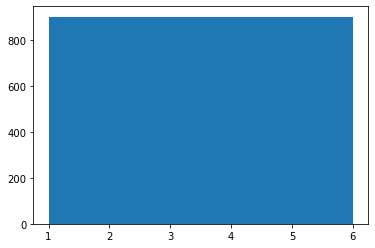

In [30]:
plt.hist(rows, bins = 6)

In [13]:
imread(fns[0])

array([[112, 104, 108, ..., 109, 113, 115],
       [118, 109, 110, ..., 104, 106, 112],
       [121, 112, 109, ..., 106, 101, 102],
       ...,
       [104, 106, 105, ..., 149, 156, 153],
       [109, 103, 101, ..., 152, 144, 144],
       [102, 100, 101, ..., 152, 145, 148]], dtype=uint16)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


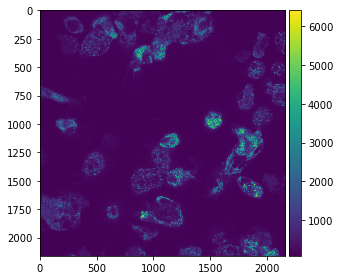

In [15]:
imshow(fns[0])

In [7]:
import sys

In [8]:
sys.path.append('../')
import data_utils

In [9]:
data_utils.size(fns[0])

'243.0 B'

In [21]:
os.stat(os.path.join(image_dir, fns[0]))

os.stat_result(st_mode=33216, st_ino=10, st_dev=54, st_nlink=1, st_uid=30046150, st_gid=30000513, st_size=6579061, st_atime=1661331511, st_mtime=1637774275, st_ctime=1637774275)

In [22]:
from skimage.io import imread, imshow

In [23]:
imread(fns[0])

PermissionError: [Errno 13] Permission denied: '/run/user/30046150/gvfs/smb-share:server=data.thecrick.org,share=lab-gutierrezm/inputs/instruments/L4OPERA/RELOCATED_2021/Claudio 2021/40e55fc4-6712-4d97-a921-61f0ee933038/r01c04-0757058077.tiff'